In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif,chi2,f_regression,mutual_info_classif

In [88]:
sns.set(rc={'figure.figsize':(12,8)})

In [89]:
data = pd.read_csv('train_1.csv')
data= data.drop(['PassengerId'],axis=1)

In [90]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply,fare_per_person
0,0,3,male,22.0,1,0,7.2500,S,1,Mr,No_Cabin,3,66.0,3.62500
1,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0,35.64165
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,3,78.0,7.92500
3,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,3,35.0,26.55000
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,No_Cabin,3,105.0,8.05000


In [91]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Total_Members', 'Title', 'Cabin_Codes', 'Age_Group',
       'Multiply', 'fare_per_person'],
      dtype='object')

In [92]:
cat_colms = ['Sex','Embarked','Title','Pclass','Cabin_Codes','Age_Group']
num_colms = set(data.columns)-set(cat_colms)
num_colms = list(num_colms)

In [93]:
num_colms

['Survived',
 'Total_Members',
 'Fare',
 'Multiply',
 'fare_per_person',
 'SibSp',
 'Age',
 'Parch']

# (Numerical Input, Numerical Output)
 A test regression problem is prepared using the make_regression() function.

 Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

[Text(0, 0.5, 'Corr'), Text(0.5, 0, 'Feature')]

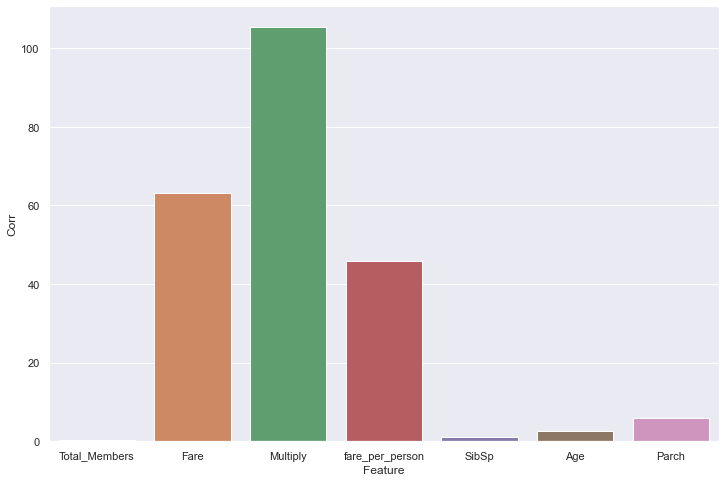

In [135]:
fs = SelectKBest(score_func=f_regression,k=5)
res = fs.fit_transform(X=data[num_colms[1:]],y=data['Survived'])
fig = sns.barplot(x=num_colms[1:],y=fs.scores_ ,) 
fig.set(xlabel='Feature',ylabel='Corr')

# (Numerical Input, Categorical Output)
 A test regression problem is prepared using the make_classification() function.

 Feature selection is performed using ANOVA F measure via the f_classif() function.

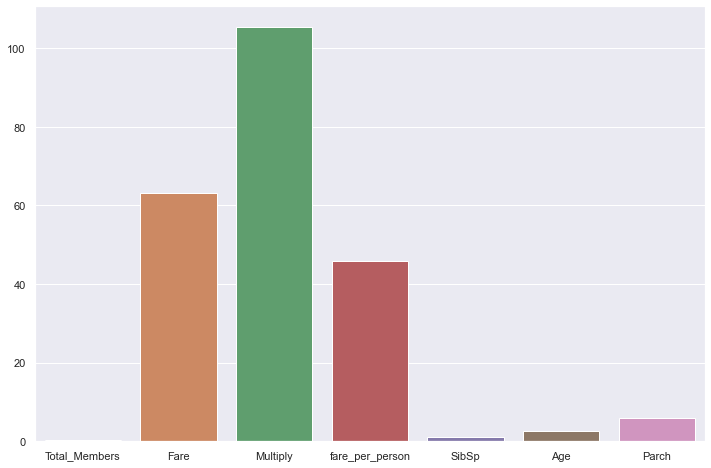

In [120]:
fs = SelectKBest(score_func=f_classif,k=4)
res = fs.fit_transform(X=data[num_colms[1:]],y=data['Survived'])
sns.barplot(x=num_colms[1:],y=fs.scores_ ) 

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
for x in cat_colms:
    encoder = LabelEncoder()
    data[x] = encoder.fit_transform(data[x])

# (Categorical Input, Categorical Output)
The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

* Chi-Squared test (contingency tables).




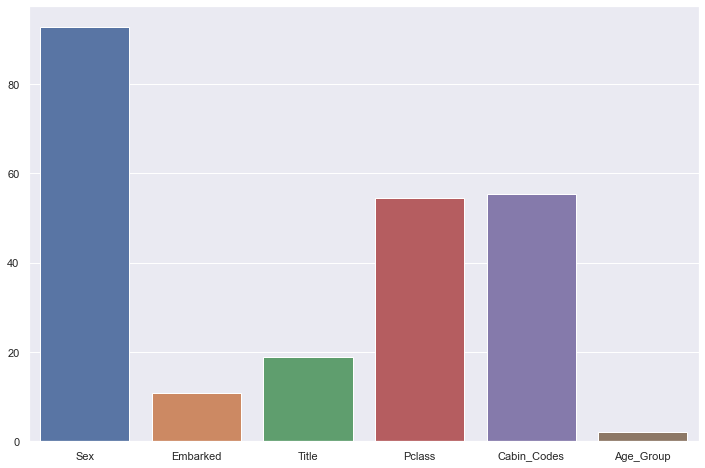

In [101]:
fs = SelectKBest(score_func=chi2,k='all')
res = fs.fit_transform(X=data[cat_colms],y=data['Survived'])
sns.barplot(x=cat_colms,y=fs.scores_)

* **Mutual Information.** _( larger is better)_

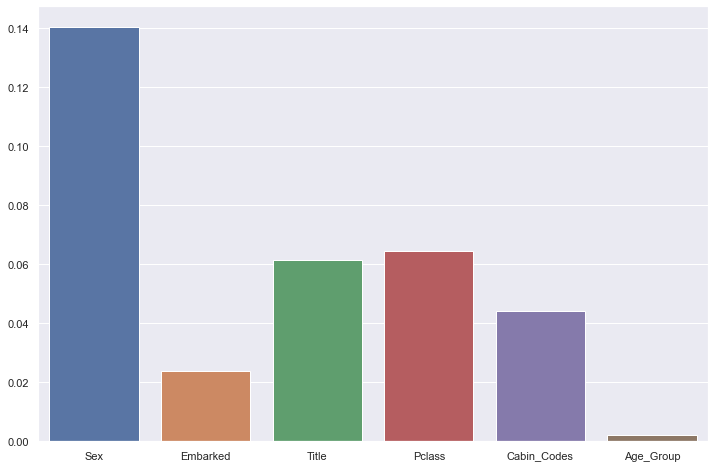

In [118]:
fs = SelectKBest(score_func=mutual_info_classif,k='all')
res = fs.fit_transform(X=data[cat_colms],y=data['Survived'])
sns.barplot(x=cat_colms,y=fs.scores_)